# Monte Carlo Chess

Can you calibrate a probability distribution on pieces and their points to make a random game of chess converge towards mate faster?
- vary board size and try custom rules I thought of
    - like cellular automata
    - also with multiple moves at once

- Simulated annealing?

cOnnection to criticality and ising model, spin glasses

then deploy to Javascript as fun website widget

random walk gist:
```python
for t in range(moves):
    team_turn = TEAMS[t%2]
    avail_pieces = pieces[team_turn]
    if avail_pieces['K'].check:
        #move to prevent check
        # if no moves, king.mate=True
    else: 
        piece = random.choice(avail_pieces)
        piece.move('random')
```

maybe `castle` should be it's own piece in avail_pieces?

resources:
- [minimax](https://diatomenterprises.com/ruby-and-recursion-find-out-all-possible-chess-knights-movements-using-minimax-algorithm/)

# todo
- Castle, en passant, and promotion
- Another analysis: how space of combinatorial possibilities changes over time


[(4, 3), (5, 3), (3, 3)]


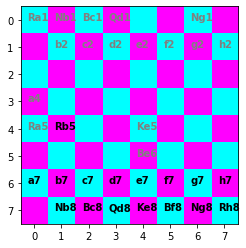

In [18]:
%matplotlib inline
from chess.game import Chess, TEAMS, COLORS

game = Chess()
game.move('a2', (0,3))
game.pick('Ke1').position = (4,4) #GOOD K
game.pick('Rh1').position = (0,4) #GOOD ROOK
game.pick('Bf1').position = (4,5) #GOOD BISH
# game.pick('Ng1').position = (3,5) #GOOD KNIGHT

# game.move('d7', (3,5))
game.pick('Ra8').position = (1,4) #BAD ROOK
print()
print(game.pick('Ke5').valid_moves(game))
# print(game.pick('Ke5').valid_moves(game))
game.show()

# Random game!

Need way to tell if there is stalemate

# Debugging:

In [ ]:
%matplotlib inline
from chess.game import Chess, TEAMS, COLORS
import random
from IPython.display import clear_output
import matplotlib.pyplot as plt
import time

def db_trial():
    error = False
    num_sim = 1
    while not error: #keep iterating until an error
        print(f'starting game {num_sim}')
        mate = False
        game = Chess()
        i = 0
        while not mate:
            try:
                piece = random.sample(game.teams(with_moves=True)[TEAMS[i%2]], 1)[0]
            except ValueError: # when no available moves
                print('putative mate')
                mate = True 
            i+=1
            try:
                game.move(piece, 'random', history=True)
            except:
                print(i) #warning: will print if you interrupt kernel
                return 
            if i > 30: #put cap on iterations
                mate=True
                num_sim+=1
                
    #         game.show(title=i)
    #         clear_output(wait=True)
    #         plt.show()
    
db_trial()

In [12]:
def thing():
    for i in range(10):
        x=1

        while x:
            print(i)
            return
            
thing()

0


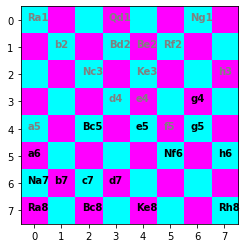

In [20]:
game.show(game.history[0])

In [2]:
for t in ('w','b'):
    print(f'---------------{t}---------')
    for p in game.teams()[t]:
        print(p, game.pick(p).valid_moves(game))

---------------w---------
a3 []
b2 [(1, 3), (1, 2)]
c3 [(2, 1), (1, 1)]
e8 []
f5 [(6, 5)]
g5 [(5, 5)]
Rb1 [(0, 0)]
Rh3 [(6, 2), (7, 1), (7, 3), (7, 0), (7, 4)]
Nd5 [(1, 3), (1, 5), (2, 6), (4, 2), (4, 6), (5, 3), (5, 5)]
Nf3 [(3, 3), (4, 0), (4, 4), (6, 0), (7, 1), (7, 3)]
Bc1 []
Kd2 [(3, 0), (4, 0), (4, 2)]
---------------b---------
a4 []
b6 []
c5 []
h5 []
Ra8 []
Rh8 []
Nd4 []
Nf6 []
Bb5 []
Bf8 []
Qg6 []
Kg7 []
